#del

In [ ]:
super_max

8

In [ ]:
# base = '/content/wardrobe_img/train/annos' 
# i = 0
# #train_labels = []
# fileers = {}
# super_max = 0
# for dir, subfolders, files in os.walk(base) :
#     for file in files:
#         with open(os.path.join(dir, file)) as fp : labels = json.load(fp)
#         for key, value in labels.items() : 
#             if (key == 'source') or (key == 'pair_id') : continue
#             # print(key)
#             fileers[file] = max(fileers.get(file, int(key[4:])), int(key[4:]))
#             super_max = max(super_max, fileers[file])
#         #     for polygon in value['segmentation'] :
#         #       # polygon = tuple(tuple(point) for point in np.array(polygon).reshape(-1, 2))
#         #       draw.polygon(polygon, fill = , )
#         # mask.save(os.path.join(base, 'masks', file.split('.')[0] + '_m.png'))
#         # display(mask)
#         # print((np.array(mask)).sum())
#         # break
#         if i % 5000 == 0 : print(i)
#         i = i + 1

0
5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000
90000
95000
100000
105000
110000
115000
120000
125000
130000
135000
140000
145000
150000
155000
160000
165000
170000
175000
180000
185000
190000


# Load data to folders

In [ ]:
from zipfile import ZipFile
with ZipFile('/content/drive/MyDrive/data/wardrobe_helper_data/segmentation/data/train_image.zip', 'r') as archive:
  archive.extractall('/content/wardrobe_img/train/') 
with ZipFile('/content/drive/MyDrive/data/wardrobe_helper_data/segmentation/data/train_annos.zip', 'r') as archive:
  archive.extractall('/content/wardrobe_img/train/') 
with ZipFile('/content/drive/MyDrive/data/wardrobe_helper_data/segmentation/data/train_masks.zip', 'r') as archive:
  archive.extractall('/content/wardrobe_img/train/') 


with ZipFile('/content/drive/MyDrive/data/wardrobe_helper_data/segmentation/data/valid_image.zip', 'r') as archive:
  archive.extractall('/content/wardrobe_img/valid/') 
with ZipFile('/content/drive/MyDrive/data/wardrobe_helper_data/segmentation/data/valid_annos.zip', 'r') as archive:
  archive.extractall('/content/wardrobe_img/valid/')
with ZipFile('/content/drive/MyDrive/data/wardrobe_helper_data/segmentation/data/valid_masks.zip', 'r') as archive:
  archive.extractall('/content/wardrobe_img/valid/') 

In [ ]:
# with ZipFile('/content/drive/MyDrive/data/wardrobe_helper_data/segmentation/data/test_image.zip', 'r') as archive:
#   archive.extractall('/content/wardrobe_img/test/') 
# with ZipFile('/content/drive/MyDrive/data/wardrobe_helper_data/segmentation/data/test_annos.zip', 'r') as archive:
#   archive.extractall('/content/wardrobe_img/test/') 

In [ ]:
# !ls wardrobe_img/valid/masks

In [ ]:
# base = '/content/wardrobe_img/valid/' 
# i = 0
# #train_labels = []
# if not os.path.isdir(os.path.join(base, 'masks')) : os.mkdir(os.path.join(base, 'masks'))
# for dir, subfolders, files in os.walk(base + 'annos') :
#     for file in files:
#         with open(os.path.join(dir, file)) as fp : labels = json.load(fp)
#         size = Image.open(os.path.join(base, 'image', file.split('.')[0] + '.jpg')).size
#         mask = Image.new('L', size, color = 0)
#         draw = ImageDraw.Draw(mask)
        
#         for key, value in labels.items() : 
#             if (key == 'source') or (key == 'pair_id') : continue
#             # print(key)
#             for polygon in value['segmentation'] :
#               # polygon = tuple(tuple(point) for point in np.array(polygon).reshape(-1, 2))
#               draw.polygon(polygon, fill = int(key[4:]), )
#         mask.save(os.path.join(base, 'masks', file.split('.')[0] + '_m.png'))
#         # display(mask)
#         # print((np.array(mask)).sum())
#         # break
#         if i % 5000 == 0 : print(i)
#         i = i + 1

In [ ]:
# # with ZipFile('train_masks.zip', 'w') as archive:
# #   archive.write('/content/wardrobe_img/train/masks') 
# import shutil
# shutil.make_archive('valid_masks', 'zip', '/content/wardrobe_img/valid/masks')

In [ ]:
# !ls wardrobe_img/train/image | wc -l

# import libraries and preprocess data

In [ ]:
!mkdir models
!cp /content/drive/MyDrive/model_seg_1.pth models/ 

In [ ]:
sp = 0
ts = 0

if __name__ == '__main__' : 
  import os, json 
  # import pandas as pd 
  # import numpy as np 
  # import PIL.ImageDraw as ImageDraw 
  import PIL.Image as Image 
  from fastai.vision.all import *
  import torch.nn.functional as F

  # def my_func(x, t) :
  #   # t = F.one_hot(t, num_classes=5)
  #   # print(x.shape, t.shape)
  #   tt = F.one_hot(t, num_classes = 5).permute(0, 3, 1, 2).to(torch.float)
  #   # print((tt < 0).sum())
  #   return BCEWithLogitsLossFlat()(x, F.one_hot(t, num_classes = 5).permute(0, 3, 1, 2).to(torch.float))

  path = Path('wardrobe_img') 
  nc = 10

  class Jaccard_multi_metric(Metric) :
    def __init__(self, dim_argmax = -1, **kwargs):
      super().__init__()
      # self.nc = nc
      self.dim_argmax = dim_argmax
      # self.value = 0
      self.kwargs = kwargs
      self.vals = []

    # def reset(self) :
    #   self.value = 0
    @staticmethod
    def Jaccard_multi(targ, pred, nc = 3) :
      # print(pred.shape, targ.shape)
      # sp = pred
      # ts = targ
      one_pred = F.one_hot(pred, nc)
      one_targ = F.one_hot(targ, nc)
      # return 1
      inter = ((one_pred == one_targ) * one_pred).sum(axis = tuple(range(len(pred.shape))))
      eps = 1e-9
      union = one_pred.sum(axis = tuple(range(len(pred.shape)))) + one_targ.sum(axis = tuple(range(len(pred.shape)))) - inter
      # assert union >= inter
      # print(union)
      # print((inter/union).mean().item()) 
      return (inter/union).nanmean().item()

    def accumulate(self, learner) :
      self.pred = learner.pred
      if self.dim_argmax: self.pred = self.pred.argmax(dim=self.dim_argmax)
      self.targ = learner.y
      assert self.pred.shape == self.targ.shape
      # print('g')
      val = self.Jaccard_multi(self.targ, self.pred, 10)#self.kwargs.get('nc', 10))
      self.vals.append(val)
      # print(val)
      # x = 1/0

    @property
    def value(self):
        "Value of the metric using accumulated preds and targs"
        # if len(self.pred) == 0: return
        # preds, targs = self.pred, self.targ
        # if self.to_np: preds,targs = preds.numpy(),targs.numpy()
        return np.mean(self.vals)

    def __call__(self, preds, targs):
        "Calculate metric on one batch of data"
        self.reset()
        self.pred = learner.pred
        if self.dim_argmax: self.pred = self.pred.argmax(dim=self.dim_argmax)
        self.targ = learner.y
        assert self.pred.shape == self.targ.shape
        return self.value()

  class Jaccard_multi_metricv2(Metric) :
      def __init__(self, dim_argmax = -1, **kwargs):
        super().__init__()
        # self.nc = nc
        self.dim_argmax = dim_argmax
        # self.value = 0
        self.kwargs = kwargs
        self.vals = []

      # def reset(self) :
      #   self.value = 0
      @staticmethod
      def Jaccard_multi(targ, pred, nc = 3) :
        targ = targ.clone()
        pred = pred.clone()
        pred[pred>0] = 1
        targ[targ>0] = 1
        # print(pred.shape, targ.shape)
        # sp = pred
        # ts = targ
        one_pred = F.one_hot(pred, nc)
        one_targ = F.one_hot(targ, nc)
        # return 1
        inter = ((one_pred == one_targ) * one_pred).sum(axis = tuple(range(len(pred.shape))))
        eps = 1e-9
        union = one_pred.sum(axis = tuple(range(len(pred.shape)))) + one_targ.sum(axis = tuple(range(len(pred.shape)))) - inter
        # assert union >= inter
        # print(union)
        # print((inter/union).mean().item()) 
        return (inter/union).nanmean().item()

      def accumulate(self, learner) :
        self.pred = learner.pred
        if self.dim_argmax: self.pred = self.pred.argmax(dim=self.dim_argmax)
        self.targ = learner.y
        assert self.pred.shape == self.targ.shape
        # print('g')
        val = self.Jaccard_multi(self.targ, self.pred, 10)#self.kwargs.get('nc', 10))
        self.vals.append(val)
        # print(val)
        # x = 1/0

      @property
      def value(self):
          "Value of the metric using accumulated preds and targs"
          # if len(self.pred) == 0: return
          # preds, targs = self.pred, self.targ
          # if self.to_np: preds,targs = preds.numpy(),targs.numpy()
          return np.mean(self.vals)

      def __call__(self, preds, targs):
          "Calculate metric on one batch of data"
          self.reset()
          self.pred = learner.pred
          if self.dim_argmax: self.pred = self.pred.argmax(dim=self.dim_argmax)
          self.targ = learner.y
          assert self.pred.shape == self.targ.shape
          return self.value()

#### AccumMetric stroes pred on ram make metric yourself #########
  def Jaccard_multi(pred, targ, nc = 3) :
    # print(pred, targ)
    one_pred = F.one_hot(pred, nc)
    one_targ = F.one_hot(targ, nc)
    inter = ((one_pred == one_targ) * one_pred).sum(axis = tuple(range(len(pred.shape))))
    union = one_pred.sum(axis = tuple(range(len(pred.shape)))) + one_targ.sum(axis = tuple(range(len(pred.shape)))) - inter
    # print(union)
    print('why')
    return (inter/union).nanmean().item()


  db = DataBlock(blocks=(ImageBlock, MaskBlock(codes = range(nc))),
                     get_items=(lambda path : get_image_files(path/'train'/'image') + get_image_files(path/'valid'/'image')),
                     splitter=FuncSplitter(lambda x : x.parent.parent.name == 'valid'),
                     get_y=lambda o: Path((os.path.sep).join(str(o).split(os.sep)[:-2]))/'masks'/f'{o.stem}_m.png',
                     item_tfms = Resize(224)
  )  
  dls = db.dataloaders(path, num_workers = 1, bs = 32) 
  # dls.c = nc 
  # print(dls.train.loss_func) 
  # save_cbs = Callback(after_epoch = (lambda x : x.learn.save(f'after_ep_{x.learn.n_epoch}')))
  learner = unet_learner(dls, resnet34, 
                        #  loss_func = (lambda x, t : BCEWithLogitsLossFlat()(x, F.one_hot(t, num_classes = nc).permute(0, 3, 1, 2).to(torch.float))), 
                         metrics = [Jaccard_multi_metricv2(dim_argmax = 1, nc = nc)],
                         opt_func = ranger,
                         self_attention = True,
                         act_cls=Mish)
  learner.load('model_seg_1', with_opt = True) 
  # print(learner.model)  
  # learner.fine_tune(1, freeze_epochs = 0, cbs = [SaveModelCallback(every_epoch = True, with_opt = True, fname = 'model_seg')])  
  # learner.lr_find()
  # print(ds.valid)    
  # learner.show_results(ds_idx=1, max_n=9)
  # learner.dls[0].show_results 
  val_out = learner.validate() 
  val_out

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
         2],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
         2],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
         2],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
         2],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
         2],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
         2],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
         2],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
         2],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
         2],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
         2],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

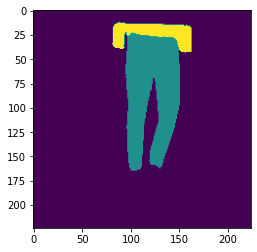

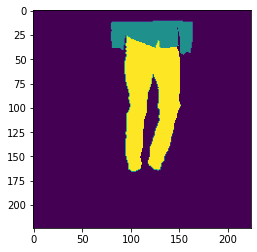

In [ ]:
# Jaccard_multi_metric.Jaccard_multi(learner.y[0], learner.pred[0].argmax(0))
# plt.figure()
# plt.imshow(learner.pred[0].argmax(0).cpu())
# plt.figure()
# plt.imshow(learner.y[0].cpu())

# (learner.pred[0].argmax(0))[75 : 100,75:100]
# (learner.y[0])[75 : 100,75:100]


In [ ]:
# learner.y
# learner.validate()
# c = SaveModelCallback(every_epoch = True, with_opt = True, fname = 'model_seg')
# c.learn = learner
# c.after_epoch()
val_out

(#2) [0.1753966212272644,0.9402917410010723]

In [ ]:
def Jaccard_multi(pred, targ, nc) :
    print(pred, targ)
    import torch.nn.functional as F
    one_pred = F.one_hot(pred, nc)
    one_targ = F.one_hot(targ, nc)
    inter = ((one_pred == one_targ) * one_pred).sum(axis = tuple(range(len(pred.shape))))
    union = one_pred.sum(axis = tuple(range(len(pred.shape)))) + one_targ.sum(axis = tuple(range(len(pred.shape)))) - inter
    # print(union)
    return (inter/union).mean().item()

pred = torch.tensor([[1,0], [2, 1]])
targ = torch.tensor([[1, 0], [0, 1]])
print(Jaccard_multi(pred, targ, 3))
mtr = AccumMetric(Jaccard_multi, dim_argmax = -1, nc = 2)

tensor([[1, 0],
        [2, 1]]) tensor([[1, 0],
        [0, 1]])
0.5


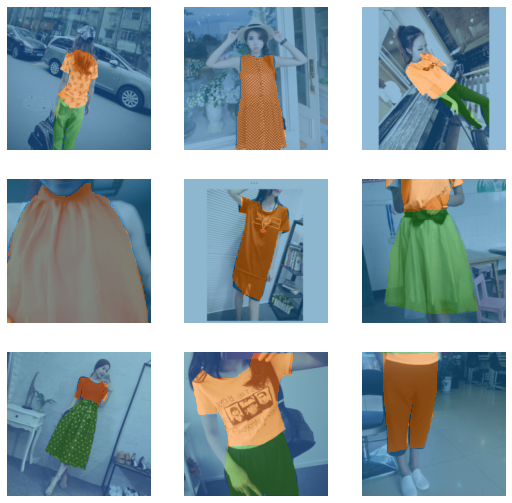

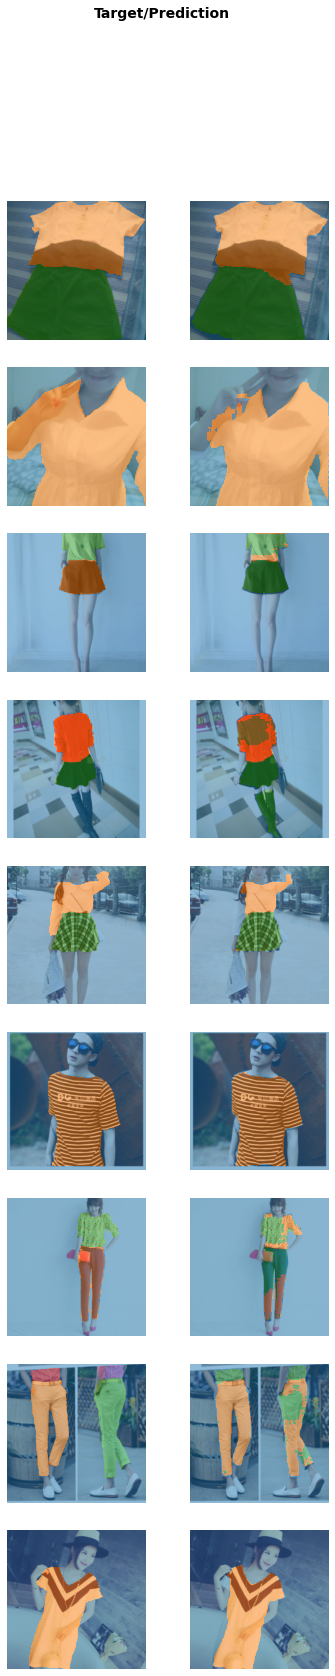

In [ ]:
#!ls 
# wardrobe_img/valid/image/005304.jpg
learner.dls.show_batch()
learner.show_results()

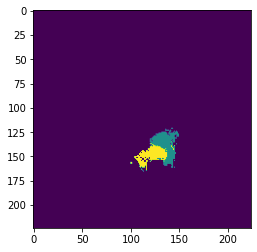

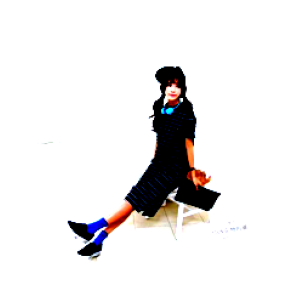

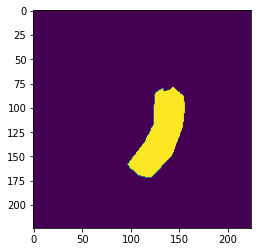

In [ ]:
i = 24
# Jaccard_multi(learner.pred.argmax(dim=1), learner.y, 10)
# X, y = learner.dls.valid.one_batch()
# X, y = learner.dls.valid.one_batch()
# X, y = learner.dls.valid.one_batch()
X, y = learner.dls.train.one_batch()
pred, *_ = learner.predict(X[i].cpu())#, with_input= True)#.dim_argmax(1)
# learner.predict(Path('wardrobe_img/valid/image/005304.jpg') )
plt.imshow((pred)*1.0)
X[i].cpu().show() #y = ((learner.pred).argmax(dim = 1)))
# Jaccard_multi(pred.argmax(dim = 0), image2tensor(y[1].cpu()).to(torch.long), 10)#image2tensor(learner.dls.valid_ds[0][0]))
# learner.get_preds()
plt.figure()
plt.imshow(image2tensor(y[i].cpu()).to(torch.long)[0])

TypeError: ignored

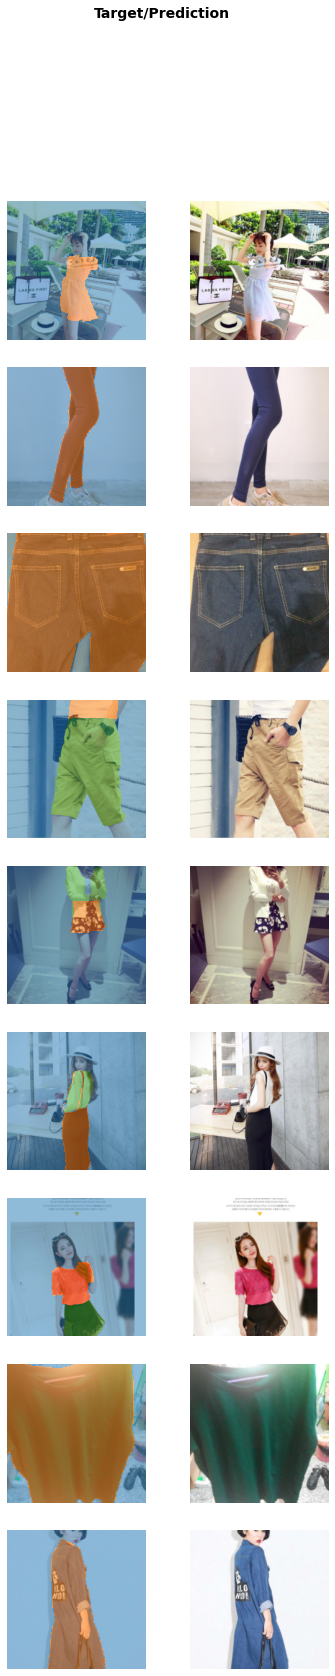

In [ ]:
learner.show_results(ds_idx=1, max_n=9)

In [ ]:
# image2tensor(learner.dls.valid_ds[0][1]).max()
# pred.shape#.argmax(dim = 1)#.max()
image2tensor(learner.dls.valid_ds[0][1]).to(torch.long).shape

torch.Size([1, 468, 351])

In [ ]:
# mtr.reset()
# # for mtr.accumulate(learn)
# mtr.value 

# learner.y.shape
val_out
# np.mean([1,2])
# learner.metrics[0].vals
# class lomb : 
#   # pred = torch.tensor([[1,0], [2, 1]])
#   # y = torch.tensor([[1, 0], [0, 1]])
#   pred = learner.pred
#   y = learner.y
# j = Jaccard_multi_metric(nc = 10, dim_argmax = 1)
# j.reset()
# j.accumulate(lomb)
# j.value

(#2) [0.03272932395339012,0.2208027851818806]

In [ ]:
# torch.tensor([[[1,2,3], [4,5,6]], [[7,8,9], [0,2,3]]]).sum(axis = (1, 2))

tensor([21, 29])

In [ ]:
# F.one_hot(torch.tensor([[1, 3], [2, 4]]), num_classes = 5).permute(2,0,1)

In [ ]:
from fastai.vision.all import *
input()
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224), bs = 128)

learn = vision_learner(dls, resnet34, metrics=[error_rate, AccumMetric(Jaccard_multi, dim_argmax = -1, nc = 2)])
def my_func(x) :
  print(x.learn.save, x.learn.n_epoch)
  x.learn.save('del')
  print('2') 

save_cbs = Callback(after_epoch = my_func)
# learn.fine_tune(0, cbs = save_cbs)
# learn.validate()
# learn.save('del')
# for pred, y in learn.get_preds() :
#   print(pred, y, input())

KeyboardInterrupt: ignored

In [ ]:
a

(TensorBase([[9.9751e-01, 2.4876e-03],
             [1.0000e+00, 4.3283e-07],
             [4.8183e-07, 1.0000e+00],
             ...,
             [9.9999e-01, 1.3826e-05],
             [1.0000e+00, 1.3630e-07],
             [9.9868e-01, 1.3237e-03]]), tensor([0, 0, 1,  ..., 0, 0, 0]))

In [ ]:
a = learn.get_preds()

TensorBase([0, 0, 1,  ..., 0, 0, 0]) TensorBase([0, 0, 1,  ..., 0, 0, 0])


In [ ]:
ls ../root/.fastai/data/oxford-iiit-pet/images/models

del.pth


In [ ]:

if __name__ == '__main__' : 

    
    # fnames = get_image_files(path/'images')
    # def label_func(x): return path/'labels'/f'{x.stem}_P{x.suffix}'
    # codes = np.loadtxt(path/'codes.txt', dtype=str)
        
    # dls = SegmentationDataLoaders.from_label_func(path, fnames, label_func, codes=codes)

    db = Datablock( get_items = get_image_files)
    print(db)

NameError: ignored

In [ ]:
l = (np.array(Image.open('wardrobe_img/train/masks/000008_m.png')))
pd.DataFrame(l).to_csv('del.csv') 

UnidentifiedImageError: ignored

In [ ]:
!zip -r 'train_masks.zip' 'wardrobe_img/train/masks'

In [ ]:
Image.open('wardrobe_img/train/image/000008.jpg').size

(468, 702)

In [ ]:
json.load(open('wardrobe_img/train/annos/000008.json')).keys()

dict_keys(['source', 'pair_id', 'item1'])

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
l.sum()

151551

In [ ]:
isinstance(1, numbers.Number)

True

In [ ]:
import numbers

In [ ]:
ImageDraw.ImageDraw.draw.draw_ink

AttributeError: ignored

In [ ]:
draw.draw.draw_ink(1)

1

In [ ]:
draw.draw.draw_polygon([0,0,1,1], 1, 1)

In [ ]:
with ZipFile('train_masks.zip', 'r') as archive:
  archive.extractall('/content/del2') 

In [ ]:
ls train_masks.zip -lah

-rw-r--r-- 1 root root 492M Jun 25 19:08 train_masks.zip


In [ ]:
!unzip '/content/drive/MyDrive/data/wardrobe_helper_data/segmentation/data/train_image.zip' -d 'del3'

In [ ]:

!cp -r 'models' '/content/drive/MyDrive/data/wardrobe_helper_data/segmentation/data'

cp: cannot stat 'models': No such file or directory


In [ ]:
path = untar_data(URLs.CAMVID)
valid_fnames = (path/'valid.txt').read_text().split('\n')
get_msk = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}'
codes = np.loadtxt(path/'codes.txt', dtype=str); codes
def FileSplitter(fname):
    "Split `items` depending on the value of `mask`."
    valid = Path(fname).read_text().split('\n') 
    def _func(x): return x.name in valid
    def _inner(o, **kwargs): return FuncSplitter(_func)(o)
    return _inner



In [ ]:
path_im = path/'images'
path_lbl = path/'labels'
fnames = get_image_files(path_im)
img_fn = fnames[10]
msk = PILMask.create(get_msk(img_fn))
sz = msk.shape
half = tuple(int(x/2) for x in sz)

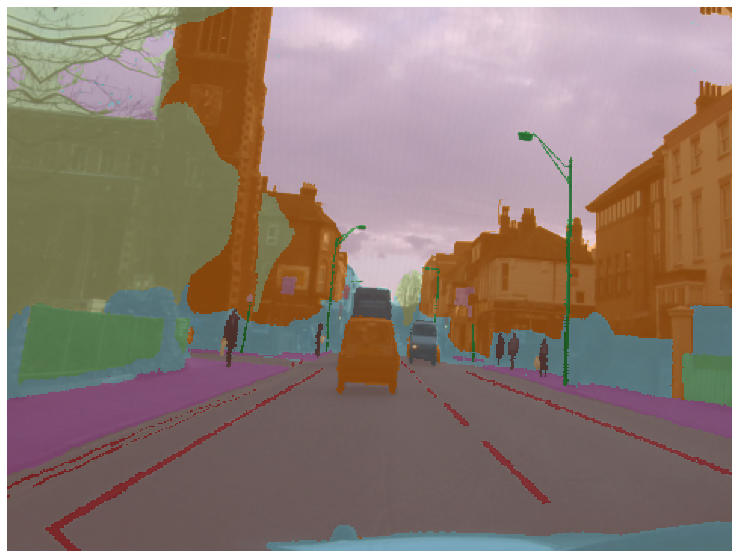

In [ ]:
camvid = DataBlock(blocks=(ImageBlock, MaskBlock(codes)),
                   get_items=get_image_files,
                   splitter=FileSplitter(path/'valid.txt'),
                   get_y=get_msk,
                   batch_tfms=[*aug_transforms(size=half), Normalize.from_stats(*imagenet_stats)])
dls = camvid.dataloaders(path/'images', bs=8)
dls.show_batch(max_n=1, vmin=1, vmax=30, figsize=(14,10))

In [ ]:
dls.vocab = codes
name2id = {v:k for k,v in enumerate(codes)}
void_code = name2id['Void']
def acc_camvid(inp, targ):
  print(inp.shape, targ.shape)
  targ = targ.squeeze(1)
  mask = targ != void_code
  return (inp.argmax(dim=1)[mask]==targ[mask]).float().mean()

In [ ]:
opt = ranger
learn = unet_learner(dls, resnet34, metrics=acc_camvid, self_attention=True, act_cls=Mish, opt_func=opt)
learn.fit_flat_cos(0, slice(1e-3))

torch.Size([8, 32, 360, 480]) torch.Size([8, 360, 480])


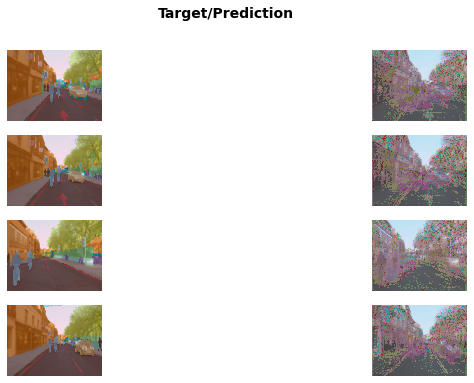

In [ ]:
learn.show_results(max_n=4, figsize=(12,6))

In [ ]:
b = learn.dls.one_batch()
b1 = learner.dls.one_batch()
p = learn.get_preds(dl=[b], with_decoded=True)[2]
p1 = learner.get_preds(dl=[b], with_decoded=True)[2]

RuntimeError: ignored

In [ ]:
# learn.dls.valid.show_results(b, p, 4)
s = learn.dls.valid
x,y,its = s.show_batch(b, max_n=4, show=False)
# b_out = type(b)(b[:self.n_inp] + (tuple(out) if is_listy(out) else (out,)))
# x1,y1,outs = self.show_batch(b_out, max_n=max_n, show=False)
# res = (x,x1,None,None) if its is None else (x, y, its, outs.itemgot(slice(self.n_inp,None)))
# if not show: return res

TensorImage([[[[254, 252, 254,  ..., 254, 254, 254],
               [254, 254, 253,  ..., 254, 254, 254],
               [240, 244, 254,  ..., 254, 254, 254],
               ...,
               [ 68,  71,  74,  ...,  74,  70,  74],
               [ 73,  73,  74,  ...,  70,  67,  70],
               [ 61,  64,  63,  ...,  68,  69,  73]],

              [[254, 252, 254,  ..., 254, 254, 254],
               [254, 254, 254,  ..., 254, 254, 254],
               [245, 248, 254,  ..., 254, 254, 254],
               ...,
               [ 69,  71,  73,  ...,  78,  74,  79],
               [ 74,  73,  73,  ...,  74,  71,  75],
               [ 61,  64,  62,  ...,  72,  74,  78]],

              [[254, 251, 254,  ..., 254, 254, 254],
               [254, 254, 250,  ..., 254, 254, 254],
               [231, 238, 254,  ..., 254, 254, 254],
               ...,
               [ 69,  71,  73,  ...,  84,  80,  87],
               [ 74,  73,  73,  ...,  79,  76,  83],
               [ 61,  64,  62,  ...